<a href="https://colab.research.google.com/github/LuthKelana/Stress-Indicator/blob/main/Stress_Indicator_dan_Tekanan_Sekitar_Lubang_Bor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stress Indicators

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
rho_batuan = 5.9  # g/cc
rho_fluida = 1  # g/cc
g = 9.8  # m/s^2
z = 1500 #m

Sv = (rho_batuan * g * z * 1000) / (10**6)  # MPa
Pp = (rho_fluida * g * z * 1000) / (10**6)  # MPa

Shmin = Sv
SHmax = 1.5 * Sv



Distribusi stress di sekitar lubang bor pada kedalaman tertentu

Masukkan massa jenis batuan dalam g/cc: 5.9
Masukkan massa jenis fluida dalam g/cc: 1


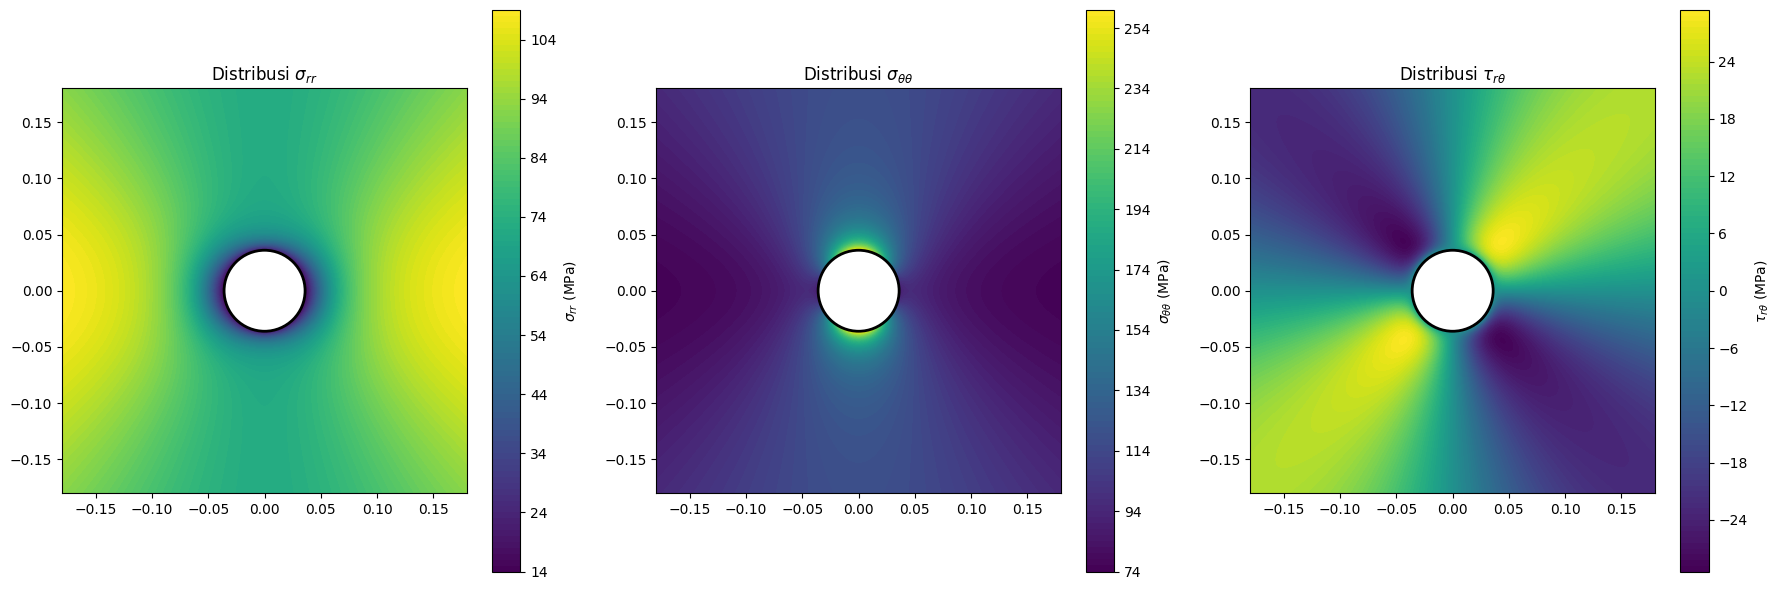

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = 5.9  # g/cc
rho_fluida = 1  # g/cc
g = 9.8  # m/s^2
z = 1500  # m

Sv = (rho_batuan * g * z * 1000) / (10**6)  # MPa
Pp = (rho_fluida * g * z * 1000) / (10**6)  # MPa

SHmax = 1.5 * Sv  # MPa
Shmin = Sv  # MPa

r_bor = 0.036  # m (radius lubang bor)
R_bor = 5 * r_bor  # Area sekitar lubang bor (m)

# Pendefinisian estimasi stress analitik
def hitung_tegangan(SHmax, Shmin, Pp, R, x, y):
    r = np.sqrt(x**2 + y**2)
    theta = np.arctan2(y, x)
    r[r < R] = R  # Menghindari pembagian oleh nol

    radial_stress = (0.5 * (SHmax + Shmin - 2 * Pp) * (1 - (R**2 / r**2))) + \
                    (0.5 * (SHmax - Shmin) * (1 - (4 * R**2 / r**2) + (3 * R**4 / r**4)) * np.cos(2 * theta)) + \
                    (Pp * R**2 / r**2)

    hoop_stress = (0.5 * (SHmax + Shmin - 2 * Pp) * (1 + (R**2 / r**2))) - \
                  (0.5 * (SHmax - Shmin) * (1 + (3 * R**4 / r**4)) * np.cos(2 * theta)) - \
                  (Pp * R**2 / r**2)

    shear_stress = (0.5 * (SHmax - Shmin) * (1 + (2 * R**2 / r**2) - (3 * R**4 / r**4)) * np.sin(2 * theta))

    return radial_stress, hoop_stress, shear_stress

# Grid
iterasi = 1000
x_vals = np.linspace(-R_bor, R_bor, iterasi)
y_vals = np.linspace(-R_bor, R_bor, iterasi)
X, Y = np.meshgrid(x_vals, y_vals)

# Hitung tegangan
radial_stress, hoop_stress, shear_stress = hitung_tegangan(SHmax, Shmin, Pp, r_bor, X, Y)

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

contour1 = axes[0].contourf(X, Y, radial_stress, levels=100, cmap="viridis")
axes[0].set_title(r"Distribusi $\sigma_{rr}$")
fig.colorbar(contour1, ax=axes[0], label=r"$\sigma_{rr}$ (MPa)")

contour2 = axes[1].contourf(X, Y, hoop_stress, levels=100, cmap="viridis")
axes[1].set_title(r"Distribusi $\sigma_{\theta\theta}$")
fig.colorbar(contour2, ax=axes[1], label=r"$\sigma_{\theta\theta}$ (MPa)")

contour3 = axes[2].contourf(X, Y, shear_stress, levels=100, cmap="viridis")
axes[2].set_title(r"Distribusi $\tau_{r\theta}$")
fig.colorbar(contour3, ax=axes[2], label=r"$\tau_{r\theta}$ (MPa)")

# Tambahkan lingkaran lubang bor
for ax in axes:
    ax.add_patch(plt.Circle((0, 0), r_bor, color="white", ec="black", lw=2))
    ax.set_xlim(-R_bor, R_bor)
    ax.set_ylim(-R_bor, R_bor)
    ax.set_aspect("equal")

plt.tight_layout()
plt.show()


Breakout pertama kali terjadi pada kedalaman: 600 m


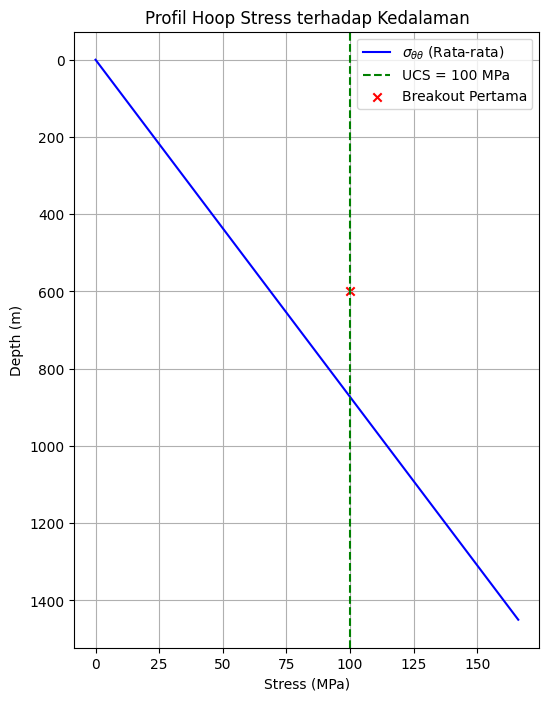

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = 5.9  # g/cc
rho_fluida = 1.0  # g/cc
g = 9.8  # m/s^2
r_bor = 0.036  # m (radius lubang bor)
R_bor = r_bor  # Area sekitar lubang bor (m)
theta = np.linspace(0, 2*np.pi, 100)  # Sudut dari 0° sampai 360° (radian)

# Rentang kedalaman diperbesar
dz = np.arange(0, 1500, 50)  # Kedalaman dari 0m hingga 3000m dengan interval 50m

# Hitung Sv, Pp, SHmax, dan Shmin pada setiap kedalaman
Sv = (rho_batuan * g * dz * 1000) / 10**6  # MPa
Pp = (rho_fluida * g * dz * 1000) / 10**6  # MPa
SHmax = 1.5 * Sv  # Asumsi SHmax = 1.5 * Sv
Shmin = Sv  # Asumsi Shmin = Sv

# Hitung hoop stress pada tiap kedalaman (menggunakan broadcasting)
hoop_stress = (0.5 * (SHmax[:, np.newaxis] + Shmin[:, np.newaxis] - 2 * Pp[:, np.newaxis]) * (1 + (R_bor**2 / r_bor**2))) - \
              (0.5 * (SHmax[:, np.newaxis] - Shmin[:, np.newaxis]) * (1 + (3 * R_bor**4 / r_bor**4)) * np.cos(2 * theta)) - \
              (Pp[:, np.newaxis] * R_bor**2 / r_bor**2)

# Mendeteksi breakout (hoop stress >= UCS)
UCS = 100  # MPa
breakout_mask = np.any(hoop_stress >= UCS, axis=1)  # Cek jika ada hoop stress yang memenuhi syarat
breakout_depths = dz[breakout_mask]  # Kedalaman di mana hoop stress >= UCS

# Menentukan kedalaman pertama kali terjadi breakout
if len(breakout_depths) > 0:
    first_breakout_depth = breakout_depths[0]
    print(f"Breakout pertama kali terjadi pada kedalaman: {first_breakout_depth} m")
else:
    print("Tidak ada breakout yang terdeteksi dalam rentang kedalaman ini.")

# Plot profil tegangan tangensial (hoop stress) terhadap kedalaman
plt.figure(figsize=(6, 8))

# Plot rata-rata hoop stress terhadap kedalaman
plt.plot(np.mean(hoop_stress, axis=1), dz, label=r'$\sigma_{\theta\theta}$ (Rata-rata)', color='b')

# Tambahkan garis UCS
plt.axvline(UCS, color='g', linestyle='--', label="UCS = 100 MPa")

# Tandai kedalaman pertama breakout
if len(breakout_depths) > 0:
    plt.scatter(UCS, first_breakout_depth, color='r', marker='x', label="Breakout Pertama")

plt.gca().invert_yaxis()  # Kedalaman bertambah ke bawah
plt.xlabel("Stress (MPa)")
plt.ylabel("Depth (m)")
plt.title("Profil Hoop Stress terhadap Kedalaman")
plt.legend()
plt.grid()
plt.show()


Breakout pertama kali terjadi pada kedalaman: 578.24 m


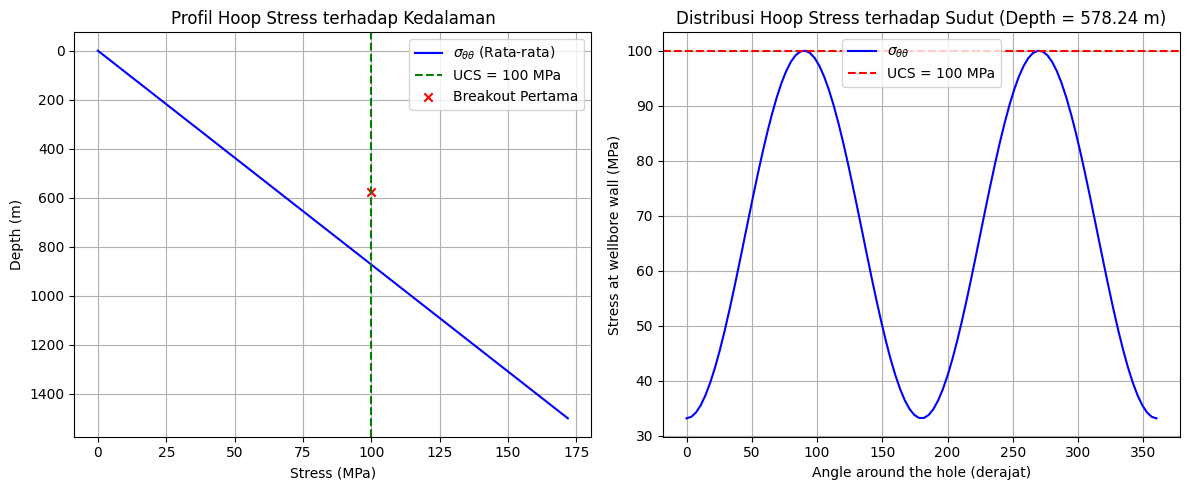

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = 5.9  # g/cc
rho_fluida = 1.0  # g/cc
g = 9.8  # m/s^2
r_bor = 0.036  # m (radius lubang bor)
R_bor = r_bor  # sama dengan radius lubnag bor karena breakout terjadi di dinding
theta = np.linspace(0, 2*np.pi, 100)  # Sudut dari 0° sampai 360° (radian)

# Rentang kedalaman diperbesar dengan interval lebih kecil untuk meningkatkan ketelitian
dz = np.arange(0, 1500, 0.01)  # Kedalaman dari 0m hingga 1500m dengan interval 1cm

# Hitung Sv, Pp, SHmax, dan Shmin pada setiap kedalaman
Sv = (rho_batuan * g * dz * 1000) / 10**6  # MPa
Pp = (rho_fluida * g * dz * 1000) / 10**6  # MPa
SHmax = 1.5 * Sv  # Asumsi SHmax = 1.5 * Sv
Shmin = Sv  # Asumsi Shmin = Sv

# Ubah dimensi SHmax, Shmin, Pp agar sesuai untuk operasi dengan theta
SHmax = SHmax[:, np.newaxis]  # Ubah menjadi (1500,1)
Shmin = Shmin[:, np.newaxis]  # Ubah menjadi (1500,1)
Pp = Pp[:, np.newaxis]  # Ubah menjadi (1500,1)

# Hitung hoop stress untuk setiap kedalaman dan setiap theta
hoop_stress = (0.5 * (SHmax + Shmin - 2 * Pp) * (1 + (R_bor**2 / r_bor**2))) - \
              (0.5 * (SHmax - Shmin) * (1 + (3 * R_bor**4 / r_bor**4)) * np.cos(2 * theta)) - \
              (Pp * R_bor**2 / r_bor**2)

# Mendeteksi breakout (hoop stress > UCS)
UCS = 100  # MPa
breakout_mask = np.any(hoop_stress > UCS, axis=1)  # Cek jika ada hoop stress yang memenuhi syarat
breakout_depths = dz[breakout_mask]  # Kedalaman di mana hoop stress >= UCS

# Menentukan kedalaman pertama kali terjadi breakout
first_breakout_depth = None
if len(breakout_depths) > 0:
    first_breakout_depth = breakout_depths[0]
    print(f"Breakout pertama kali terjadi pada kedalaman: {first_breakout_depth} m")
else:
    print("Tidak ada breakout yang terdeteksi dalam rentang kedalaman ini.")

# Plot 1: Hoop Stress terhadap Kedalaman
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot pertama (grafik 1)
plt.plot(np.mean(hoop_stress, axis=1), dz, label=r'$\sigma_{\theta\theta}$ (Rata-rata)', color='b')

# Tambahkan garis UCS
plt.axvline(UCS, color='g', linestyle='--', label="UCS = 100 MPa")

# Tandai kedalaman pertama breakout
if first_breakout_depth is not None:
    plt.scatter(UCS, first_breakout_depth, color='r', marker='x', label="Breakout Pertama")

plt.gca().invert_yaxis()  # Kedalaman bertambah ke bawah
plt.xlabel("Stress (MPa)")
plt.ylabel("Depth (m)")
plt.title("Profil Hoop Stress terhadap Kedalaman")
plt.legend()
plt.grid()

# Plot 2: Hoop Stress terhadap Theta di Kedalaman Breakout Pertama
if first_breakout_depth is not None:
    index = np.where(dz == first_breakout_depth)[0][0]  # Cari indeks kedalaman tersebut
    hoop_stress_at_breakout = hoop_stress[index, :]  # Ambil hoop stress pada kedalaman ini

    plt.subplot(1, 2, 2)  # Subplot kedua (grafik 2)
    plt.plot(np.degrees(theta), hoop_stress_at_breakout, color='b', label=r'$\sigma_{\theta\theta}$')

    # Tambahkan garis UCS untuk referensi
    plt.axhline(UCS, color='r', linestyle='--', label="UCS = 100 MPa")

    plt.xlabel("Angle around the hole (derajat)")
    plt.ylabel("Stress at wellbore wall (MPa)")
    plt.title(f"Distribusi Hoop Stress terhadap Sudut (Depth = {first_breakout_depth} m)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


Breakout pertama kali terjadi pada kedalaman: 578.24 m
Lebar breakout: 178.18 derajat


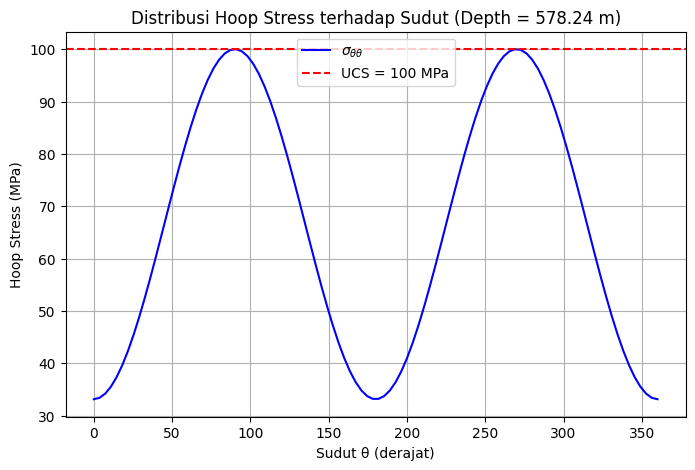

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = 5.9  # g/cc
rho_fluida = 1.0  # g/cc
g = 9.8  # m/s^2
r_bor = 0.036  # m (radius lubang bor)
R_bor = r_bor  # sama dengan radius lubang bor
theta = np.linspace(0, 2*np.pi, 100)  # Sudut dari 0° sampai 360° dalam radian

# Rentang kedalaman diperbesar dengan interval lebih kecil untuk meningkatkan ketelitian
dz = np.arange(0, 1500, 0.01)  # Kedalaman dari 0m hingga 1500m dengan interval 1cm

# Hitung Sv, Pp, SHmax, dan Shmin pada setiap kedalaman
Sv = (rho_batuan * g * dz * 1000) / 10**6  # MPa
Pp = (rho_fluida * g * dz * 1000) / 10**6  # MPa
SHmax = 1.5 * Sv  # Asumsi SHmax = 1.5 * Sv
Shmin = Sv  # Asumsi Shmin = Sv

# Ubah dimensi SHmax, Shmin, Pp agar sesuai untuk operasi dengan theta
SHmax = SHmax[:, np.newaxis]
Shmin = Shmin[:, np.newaxis]
Pp = Pp[:, np.newaxis]

# Hitung hoop stress untuk setiap kedalaman dan setiap theta
hoop_stress = (0.5 * (SHmax + Shmin - 2 * Pp) * (1 + (R_bor**2 / r_bor**2))) - \
              (0.5 * (SHmax - Shmin) * (1 + (3 * R_bor**4 / r_bor**4)) * np.cos(2 * theta)) - \
              (Pp * R_bor**2 / r_bor**2)

# UCS sebagai batas kritis
UCS = 100  # MPa

# Mendeteksi breakout (hoop stress > UCS)
breakout_mask = np.any(hoop_stress > UCS, axis=1)
breakout_depths = dz[breakout_mask]

# Menentukan kedalaman pertama kali terjadi breakout
first_breakout_depth = None
if len(breakout_depths) > 0:
    first_breakout_depth = breakout_depths[0]
    print(f"Breakout pertama kali terjadi pada kedalaman: {first_breakout_depth} m")
else:
    print("Tidak ada breakout yang terdeteksi dalam rentang kedalaman ini.")

# Menghitung sudut breakout jika terjadi
if first_breakout_depth is not None:
    index = np.where(dz == first_breakout_depth)[0][0]
    hoop_stress_at_breakout = hoop_stress[index, :]

    # Mencari titik perpotongan dengan UCS
    mask_above = hoop_stress_at_breakout >= UCS
    theta_breakout = theta[mask_above]

    if len(theta_breakout) >= 2:
        theta1, theta2 = np.degrees(theta_breakout[0]), np.degrees(theta_breakout[-1])
        breakout_width = theta2 - theta1
        print(f"Lebar breakout: {breakout_width:.2f} derajat")
    else:
        print("Tidak cukup titik perpotongan untuk menentukan lebar breakout.")

# Plot Hoop Stress terhadap Theta di Kedalaman Breakout Pertama
if first_breakout_depth is not None:
    plt.figure(figsize=(8, 5))
    plt.plot(np.degrees(theta), hoop_stress_at_breakout, color='b', label=r'$\sigma_{\theta\theta}$')
    plt.axhline(UCS, color='r', linestyle='--', label="UCS = 100 MPa")
    plt.xlabel("Sudut θ (derajat)")
    plt.ylabel("Hoop Stress (MPa)")
    plt.title(f"Distribusi Hoop Stress terhadap Sudut (Depth = {first_breakout_depth} m)")
    plt.legend()
    plt.grid()
    plt.show()


Breakout pertama kali terjadi pada kedalaman: 578.24 m


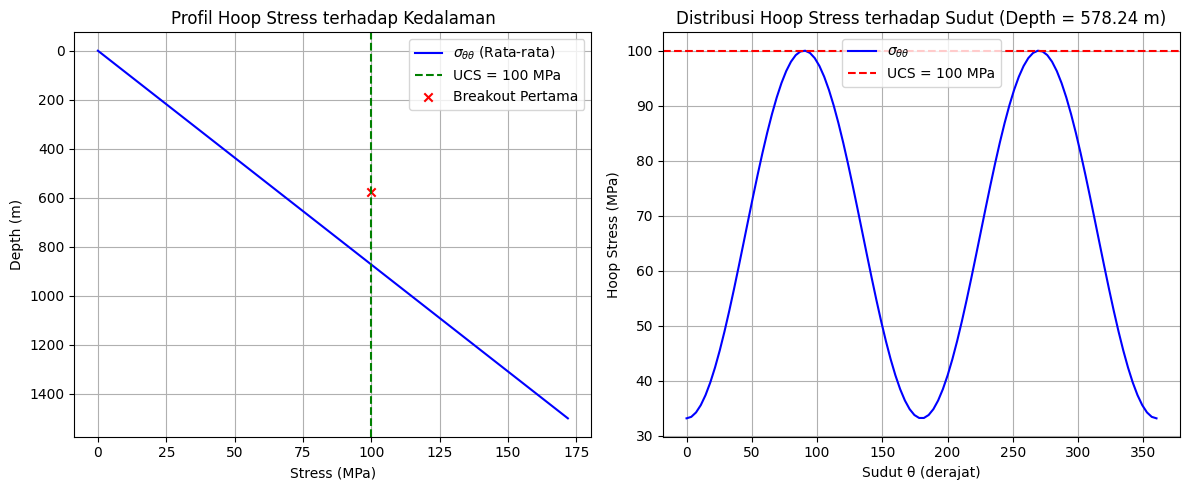

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
rho_batuan = 5.9  # g/cc
rho_fluida = 1.0  # g/cc
g = 9.8  # m/s^2
r_bor = 0.036  # m (radius lubang bor)
R_bor = r_bor  # Sama dengan radius lubang bor karena breakout terjadi di dinding
theta = np.linspace(0, 2*np.pi, 100)  # Sudut dari 0° sampai 360° (radian)

# Rentang kedalaman diperbesar dengan interval lebih kecil untuk meningkatkan ketelitian
dz = np.arange(0, 1500, 0.01)  # Kedalaman dari 0m hingga 1500m dengan interval 1cm

# Hitung Sv, Pp, SHmax, dan Shmin pada setiap kedalaman
Sv = (rho_batuan * g * dz * 1000) / 10**6  # MPa
Pp = (rho_fluida * g * dz * 1000) / 10**6  # MPa
SHmax = 1.5 * Sv  # Asumsi SHmax = 1.5 * Sv
Shmin = Sv  # Asumsi Shmin = Sv

# Ubah dimensi SHmax, Shmin, Pp agar sesuai untuk operasi dengan theta
SHmax = SHmax[:, np.newaxis]  # Ubah menjadi (150000,1)
Shmin = Shmin[:, np.newaxis]  # Ubah menjadi (150000,1)
Pp = Pp[:, np.newaxis]  # Ubah menjadi (150000,1)

# Hitung hoop stress untuk setiap kedalaman dan setiap theta
hoop_stress = (0.5 * (SHmax + Shmin - 2 * Pp) * (1 + (R_bor**2 / r_bor**2))) - \
              (0.5 * (SHmax - Shmin) * (1 + (3 * R_bor**4 / r_bor**4)) * np.cos(2 * theta)) - \
              (Pp * R_bor**2 / r_bor**2)

# Mendeteksi breakout (hoop stress > UCS)
UCS = 100  # MPa
breakout_mask = np.any(hoop_stress > UCS, axis=1)  # Cek jika ada hoop stress yang memenuhi syarat
breakout_depths = dz[breakout_mask]  # Kedalaman di mana hoop stress > UCS

# Menentukan kedalaman pertama kali terjadi breakout
first_breakout_depth = None
if len(breakout_depths) > 0:
    first_breakout_depth = breakout_depths[0]
    print(f"Breakout pertama kali terjadi pada kedalaman: {first_breakout_depth:.2f} m")
else:
    print("Tidak ada breakout yang terdeteksi dalam rentang kedalaman ini.")

# Plot 1: Hoop Stress terhadap Kedalaman
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Subplot pertama (grafik 1)
plt.plot(np.mean(hoop_stress, axis=1), dz, label=r'$\sigma_{\theta\theta}$ (Rata-rata)', color='b')

# Tambahkan garis UCS
plt.axvline(UCS, color='g', linestyle='--', label="UCS = 100 MPa")

# Tandai kedalaman pertama breakout
if first_breakout_depth is not None:
    plt.scatter(UCS, first_breakout_depth, color='r', marker='x', label="Breakout Pertama")

plt.gca().invert_yaxis()  # Kedalaman bertambah ke bawah
plt.xlabel("Stress (MPa)")
plt.ylabel("Depth (m)")
plt.title("Profil Hoop Stress terhadap Kedalaman")
plt.legend()
plt.grid()

# Plot 2: Hoop Stress terhadap Theta di Kedalaman Breakout Pertama
if first_breakout_depth is not None:
    index = np.where(dz == first_breakout_depth)[0][0]  # Cari indeks kedalaman tersebut
    hoop_stress_at_breakout = hoop_stress[index, :]  # Ambil hoop stress pada kedalaman ini

    plt.subplot(1, 2, 2)  # Subplot kedua (grafik 2)
    plt.plot(np.degrees(theta), hoop_stress_at_breakout, color='b', label=r'$\sigma_{\theta\theta}$')

    # Tambahkan garis UCS untuk referensi
    plt.axhline(UCS, color='r', linestyle='--', label="UCS = 100 MPa")

    plt.xlabel("Sudut θ (derajat)")
    plt.ylabel("Hoop Stress (MPa)")
    plt.title(f"Distribusi Hoop Stress terhadap Sudut (Depth = {first_breakout_depth:.2f} m)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()
